# PROJECT-Employee Performance model 

In [254]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ops.reset_default_graph()

# IMPORTING DATASET

In [255]:
import pandas as pd
df= pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [256]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# label encoding

In [188]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [189]:
# All Categorical variables to be Encoded starting from 0
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
#TASK-3:-Identify the errors and fix them before modelling the Automobile prices
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df.iloc[:,0]= label_encoder.fit_transform(df.iloc[:,0])
df.iloc[:,2]= label_encoder.fit_transform(df.iloc[:,2])
df.iloc[:,3]= label_encoder.fit_transform(df.iloc[:,3])
df.iloc[:,4]= label_encoder.fit_transform(df.iloc[:,4])
df.iloc[:,5]= label_encoder.fit_transform(df.iloc[:,5])
df.iloc[:,6]= label_encoder.fit_transform(df.iloc[:,6])
df.iloc[:,7]= label_encoder.fit_transform(df.iloc[:,7])
df.iloc[:,26]= label_encoder.fit_transform(df.iloc[:,26])
df.iloc[:,16]= label_encoder.fit_transform(df.iloc[:,16])

In [190]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1196,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1197,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1198,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


# Variables for input and output

In [191]:
x_vals = np.array([x[0:27] for x in df.values])
y_vals = pd.get_dummies(df['PerformanceRating']).values

In [192]:
x_vals

array([[   0,   32,    1, ...,    0,    8,    0],
       [   1,   47,    1, ...,    1,    7,    0],
       [   2,   40,    1, ...,    1,   12,    0],
       ...,
       [1197,   50,    1, ...,    3,    8,    0],
       [1198,   34,    0, ...,    7,    7,    0],
       [1199,   24,    0, ...,    2,    0,    1]])

# LABELS OF TARGET VARIABLE

In [193]:
y_vals

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

# CREATING SESSION OF TENSORFLOW

In [231]:
 sess = tf.Session()

# SET SEED

In [232]:
seed = 3
tf.set_random_seed(seed)
np.random.seed(seed)

# SPLITTING DATA INTO TRAIN/TEST = 80%/20%

In [233]:

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# Checking the dimensions

In [234]:
print(x_vals_train.shape)
print(x_vals_test.shape)
print(y_vals_train.shape)
print(y_vals_test.shape)

(960, 61)
(240, 61)
(960, 3)
(240, 3)


# Normalize the data

In [235]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))


# DECLARE THE BATCH SIZE

In [236]:

batch_size = 10

# Initialize placeholders

In [245]:
x_data = tf.placeholder(shape=[None, 61], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,3], dtype=tf.float32)
#prediction = tf.placeholder(dtype=tf.int32, shape=[None,3])

# Create variables for both Neural Network Layers,There are 5 layers(1-input,3-hidden,1-output layers)

In [246]:
hidden_layer_nodes1 = 50
hidden_layer_nodes2 = 40
hidden_layer_nodes3 = 30
A1 = tf.Variable(tf.random_normal(shape=[61,hidden_layer_nodes1]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes1]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes1,hidden_layer_nodes2])) 
b2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes2]))
A3 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes2,hidden_layer_nodes3])) 
b3 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes3]))
A4 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes3,3]))
b4 = tf.Variable(tf.random_normal(shape=[3]))

# Declare model operations

In [247]:
hidden_output1 = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
hidden_output2=tf.nn.relu(tf.add(tf.matmul(hidden_output1, A2), b2))
hidden_output3=tf.nn.relu(tf.add(tf.matmul(hidden_output2, A3), b3))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output3, A4), b4))

In [248]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(final_output, y_target))

# Accuracy

In [249]:
my_acc = tf.reduce_mean(tf.cast(tf.equal(y_target,final_output), tf.float32))


# Declare optimizer

In [250]:
my_opt = tf.train.MomentumOptimizer(learning_rate=0.0005, momentum=0.9)
train_step = my_opt.minimize(loss)

# Initialize variables

In [251]:
init = tf.global_variables_initializer()
sess.run(init)

# Training loop

In [252]:
loss_vec = []
test_loss = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
  
    rand_y = y_vals_train[rand_index]
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss,feed_dict={x_data: rand_x, y_target: rand_y})
    
    loss_vec.append(np.sqrt(temp_loss))
    temp_acc = sess.run(my_acc,feed_dict={x_data: rand_x, y_target: rand_y})
    
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(test_temp_loss)+'              '+'Accuracy:- '+str(temp_acc))

Generation: 50. Loss = 0.0              Accuracy:- 0.6666667
Generation: 100. Loss = 0.0              Accuracy:- 0.6666667
Generation: 150. Loss = 0.0              Accuracy:- 0.6666667
Generation: 200. Loss = 0.0              Accuracy:- 0.6666667
Generation: 250. Loss = 0.0              Accuracy:- 0.6666667
Generation: 300. Loss = 0.0              Accuracy:- 0.6666667
Generation: 350. Loss = 0.0              Accuracy:- 0.6666667
Generation: 400. Loss = 0.0              Accuracy:- 0.6666667
Generation: 450. Loss = 0.0              Accuracy:- 0.6666667
Generation: 500. Loss = 0.0              Accuracy:- 0.6666667


# Plot loss (MSE) over time

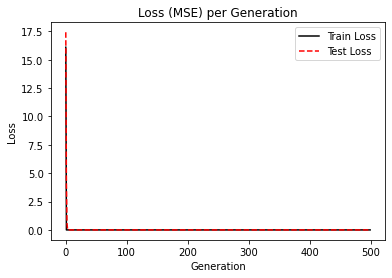

'my_NN_model-450'

In [253]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

saver = tf.train.Saver()



saver.save(sess, "model.ckpt")

saver.save(sess, 'my_NN_model',global_step=450)

# USING ONE HOT ENCODING

In [257]:
y_vals = pd.get_dummies(df['PerformanceRating'])

In [258]:
del(df['PerformanceRating'])
del(df['EmpNumber'])

In [259]:
atri = df.columns[df.dtypes == np.object]

In [260]:
atri

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

In [261]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,12,4,10,2,2,10,7,0,8,No
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,12,4,20,2,3,7,7,1,7,No
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,21,3,20,2,3,18,13,1,12,No
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,15,2,23,2,2,21,6,12,6,No
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,14,4,10,1,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,20,2,6,3,3,6,5,0,4,No
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,17,1,4,2,3,1,0,0,0,No
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,11,3,20,3,3,20,8,3,8,No
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,14,2,9,3,4,8,7,7,7,No


In [262]:
x_vals = pd.get_dummies(data=df, columns=atri)

In [263]:
x_vals

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,2,12,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,5,21,...,0,0,0,0,1,0,0,1,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,1,1,0,1,0
4,60,16,4,1,84,3,2,1,8,14,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,20,...,0,0,0,0,1,0,0,1,1,0
1196,37,10,2,4,80,4,1,4,3,17,...,0,0,0,0,0,1,1,0,1,0
1197,50,28,1,4,74,4,1,3,1,11,...,0,0,0,0,0,1,0,1,1,0
1198,34,9,3,4,46,2,3,2,1,14,...,0,0,0,0,0,1,1,0,1,0


In [264]:
x_vals = np.array(x_vals.values)

In [265]:
y_vals=np.array(y_vals.values)